
# Position of a quasar

You measure the position of a quasar $N$ times with the same telescope i.e. errors are homoscedastic. Let's say the underlying process is Gaussian, the true position is $\mu = 1$ (in suitable units), and the errors are $\sigma = 0.2$.

## Part 1

- Generate fake measurements. Treat each of these observations as an estimate of the true distribution. So we'll center a Gaussian (with the known $\sigma$) at each point. This is the probability of each data point, $p(x_i | \mu, \sigma )$;
- Plot each of the individual likelihoods separately. Also plot their product (i.e. the likelihood of the dataset $\{x_i\}$). Make sure the x grid has enough points;
- Just read off the maximum likelihood solution (e.g. using np.argsort);
- Compare it with the MLE estimator derived above.

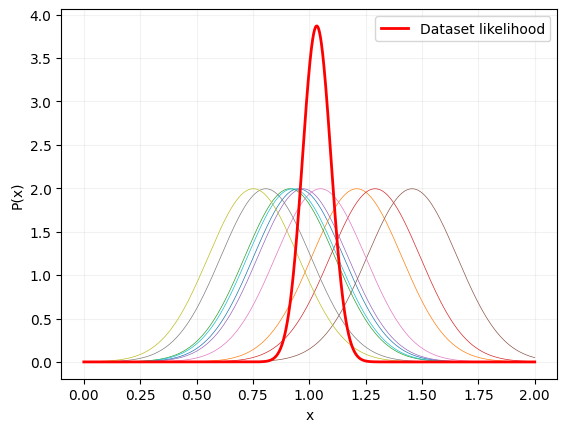

The likelihood is maximized at: 1.03303
The MLE calculated analytically is the arithmetic mean:1.03306
Relative error: 0.0%


In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

mu = 1
sigma = 0.2
N = 10     # Number of measurements

# Generate random points
x_sample = np.random.normal(loc=mu, scale=sigma, size=N)

grid = np.linspace(0, 2, 1000)

likelihood = 1

for i in range(N):
    gaussian = norm(loc=x_sample[i],scale=sigma)     # Probability of the datapoint given the parameter -> likelihood of the single measurement
    plt.plot(grid, gaussian.pdf(grid), lw = 0.5)
    likelihood *= gaussian.pdf(grid)

plt.plot(grid, likelihood, lw = 2, c = 'red', label = 'Dataset likelihood')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.grid(c='grey', alpha = 0.1)
plt.legend()
plt.show()

# Searching the MLE
sort = np.argsort(likelihood)
max_ind = sort[-1]
l_max = grid[max_ind]
print('The likelihood is maximized at: ' + str(round(l_max, 5)))

# Confronting with the theoretical MLE (arithmetic mean)
mu_exp = np.mean(x_sample)
rel_err_mu = abs(l_max - mu_exp) / mu_exp * 100
print('The MLE calculated analytically is the arithmetic mean:' + str(round(mu_exp, 5)))
print('Relative error: ' + str(round(rel_err_mu, 1)) + '%')



## Part 2

Check the Fisher matrix error estimate makes sense:

- Do a rough $2^{nd}$ order differentation of our log-likelihood function with np.diff,
- divide through by our $\Delta\theta^2$ to get the correct normalization,
- multiply by $-1$,
- then take the square root.
- Compare with the Fisher matrix error derived above;
- Plot a Gaussian at the measured $\mu$ with this error as the scale to see if it matches the numerical likelihood distribution. (The normalization won't be captured, you can rescale it as you like to check it agrees)

The Fisher matrix error estimate is: 0.06325
The theoretical value is: 0.06325
Relative error: 0.0%


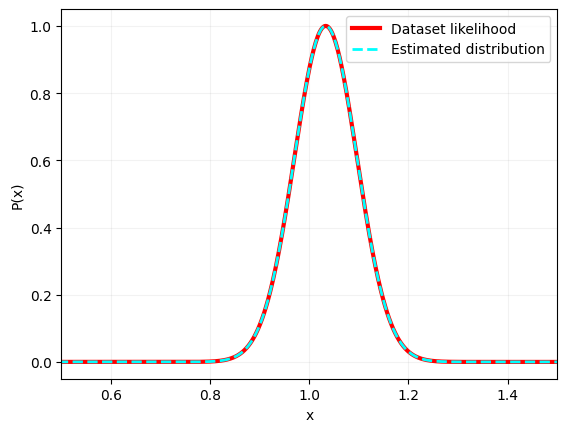

In [37]:
# I want the log likelihood:
lnL = np.log(likelihood)

# Fisher matrix error estimate
d2lnL = np.diff(lnL, n=2)     
dx = grid[1]-grid[0]     # The x values are equally spaced
sigma_mu = d2lnL/(dx**2)
sigma_mu *= -1
sigma_mu = 1/np.sqrt(sigma_mu)
print('The Fisher matrix error estimate is: ' + str(round(sigma_mu[max_ind], 5)))

# Theoretical value
print('The theoretical value is: ' + str(round(sigma/np.sqrt(N), 5)))
rel_err_sigma = abs(sigma_mu[max_ind] - sigma/np.sqrt(N)) / sigma/np.sqrt(N) * 100
print('Relative error: ' + str(round(rel_err_sigma, 1)) + '%')

# Comparing the Gaussians
# Dividing both gaussians for their max value, so the highest value for the two is 1 and the comparison is easy for each dataset
est_gauss = norm(loc=l_max, scale=sigma_mu[max_ind])
plt.plot(grid, likelihood/max(likelihood), lw = 3, c = 'red', label = 'Dataset likelihood')
plt.plot(grid, est_gauss.pdf(grid)/max(est_gauss.pdf(grid)), lw = 2, ls = 'dashed', c = 'aqua', label = 'Estimated distribution')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.xlim([0.50, 1.50])
plt.grid(c='grey', alpha = 0.1)
plt.legend()
plt.show()

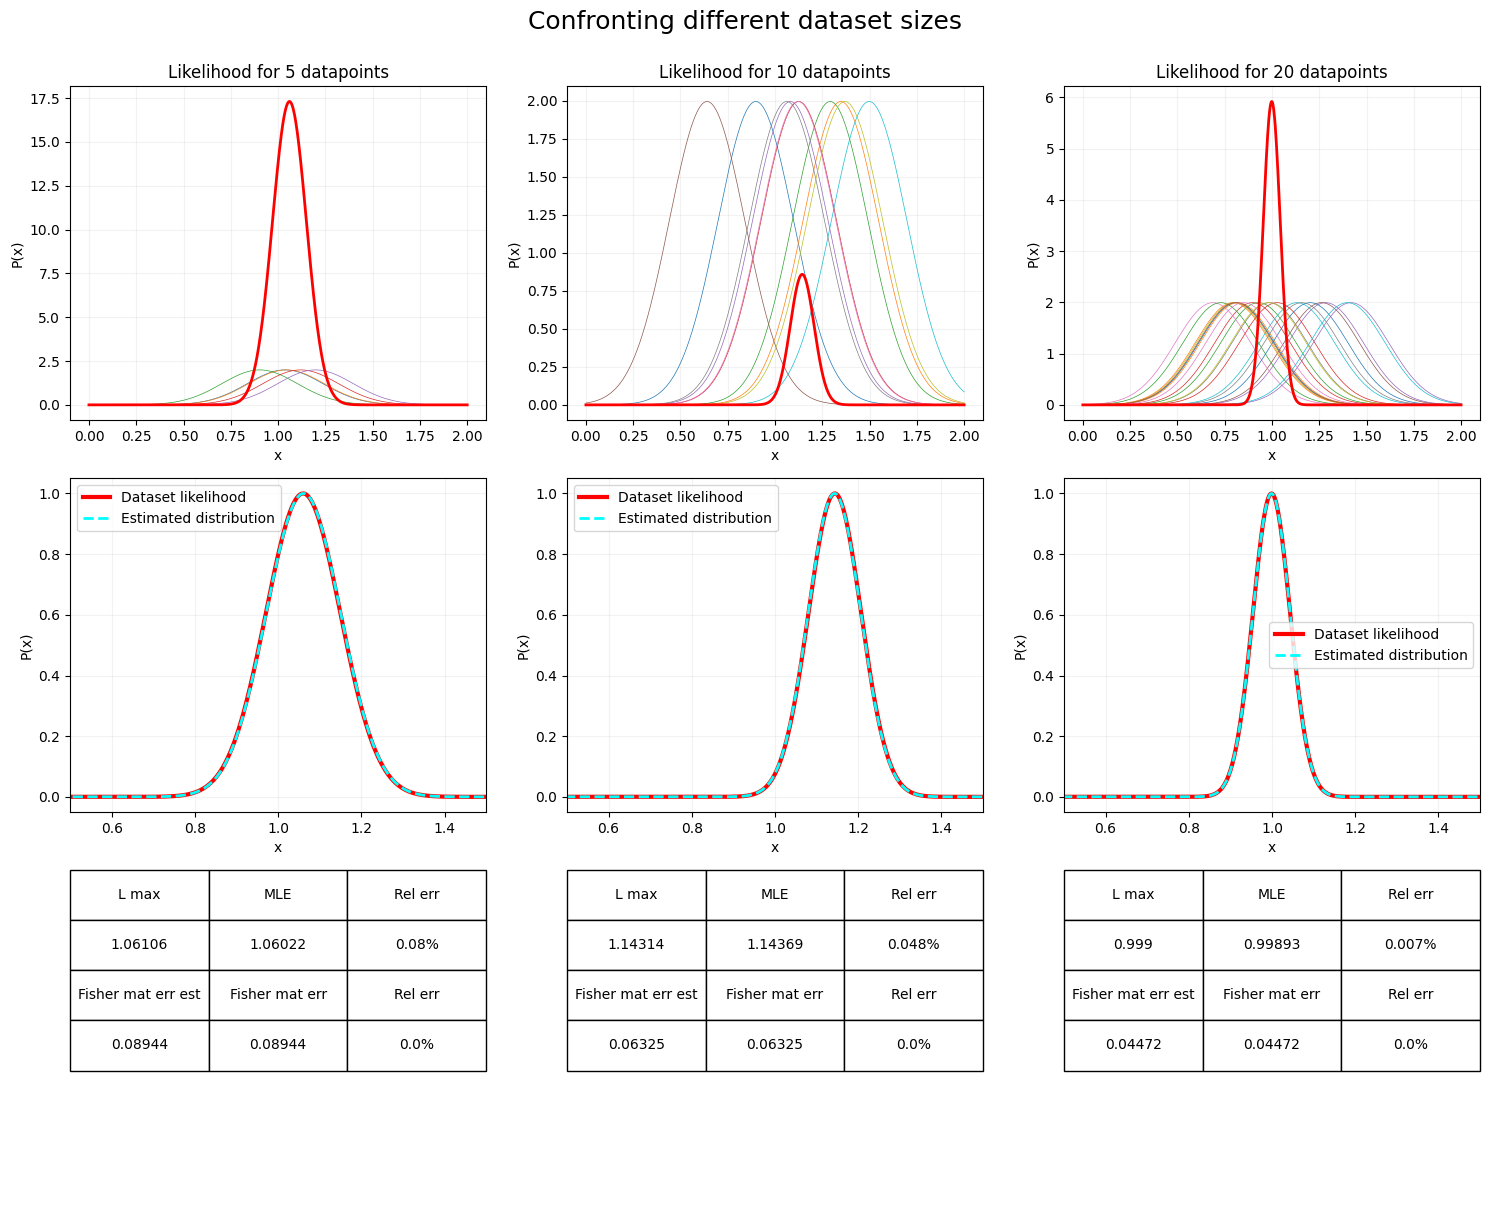

In [38]:
# Repeating for different values N

Dataset_size = np.array([5, 10, 20])
mu = 1
sigma = 0.2

fig, ax = plt.subplots(3, 3, figsize=(15, 13))
fig.suptitle('Confronting different dataset sizes', fontsize = 18)

grid = np.linspace(0, 2, 1000)
dx = grid[1]-grid[0]

for i, N in enumerate(Dataset_size):

    x_sample = np.random.normal(loc=mu, scale=sigma, size=N)

    likelihood = 1
    
    for j in range(N):
        gaussian = norm(loc=x_sample[j],scale=sigma)
        ax[0, i].plot(grid, gaussian.pdf(grid), lw = 0.5)
        likelihood *= gaussian.pdf(grid)

    ax[0, i].plot(grid, likelihood, lw = 2, c = 'red', label = 'Dataset likelihood')
    ax[0, i].set_xlabel('x')
    ax[0, i].set_ylabel('P(x)')
    ax[0, i].grid(c='grey', alpha = 0.1)
    ax[0, i].set_title('Likelihood for ' + str(N) + ' datapoints')

    sort = np.argsort(likelihood)
    max_ind = sort[-1]
    l_max = grid[max_ind]
    mu_exp = np.mean(x_sample)
    rel_err_mu = abs(l_max - mu_exp) / mu_exp * 100

    lnL = np.log(likelihood)
    d2lnL = np.diff(lnL, n=2)     
    
    sigma_mu = d2lnL/(dx**2)
    sigma_mu *= -1
    sigma_mu = 1/np.sqrt(sigma_mu)
    sigma_mu_exp = sigma/np.sqrt(N)

    est_gauss = norm(loc=l_max, scale=sigma_mu[max_ind])
    ax[1, i].plot(grid, likelihood/max(likelihood), lw = 3, c = 'red', label = 'Dataset likelihood')
    ax[1, i].plot(grid, est_gauss.pdf(grid)/max(est_gauss.pdf(grid)), lw = 2, ls = 'dashed', c = 'aqua', label = 'Estimated distribution')
    ax[1, i].set_xlabel('x')
    ax[1, i].set_ylabel('P(x)')
    ax[1, i].set_xlim([0.50, 1.50])
    ax[1, i].grid(c='grey', alpha = 0.1)
    ax[1, i].legend(loc='best')

    table_data = np.column_stack((['L max'] + [str(round(l_max, 5))] + ['Fisher mat err est'] + [str(round(sigma_mu[max_ind], 5))],
                                  ['MLE'] + [str(round(mu_exp, 5))] + ['Fisher mat err'] + [str(round(sigma_mu_exp, 5))],
                                  ['Rel err'] + [str(round(abs(l_max-mu_exp)/mu_exp*100, 3)) + '%'] + ['Rel err'] + [str(round(abs(sigma_mu[max_ind]-sigma_mu_exp)/sigma_mu_exp*100, 3)) + '%']))

    ax[2, i].axis('off')
    table = ax[2, i].table(cellText=table_data, loc='center', cellLoc='center', colLabels=None, bbox=[0.0, 0.4, 1.0, 0.6])
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.3, 1.2)

plt.subplots_adjust(hspace=0.1)  
plt.tight_layout(rect=[0, 0.05, 1, 0.98], w_pad=1.5)
plt.show()



## Part 3

Let's make our model more realistic. Our $N$ measurements were taken in different nights, where the sky behaved differently (i.e. errors are heteroscedastic). Let's assume that each measurment has a $\sigma_i$ that is normally distribured with mean $0.2$ and standard deviation $0.05$.

- Generalize your code from above to this case

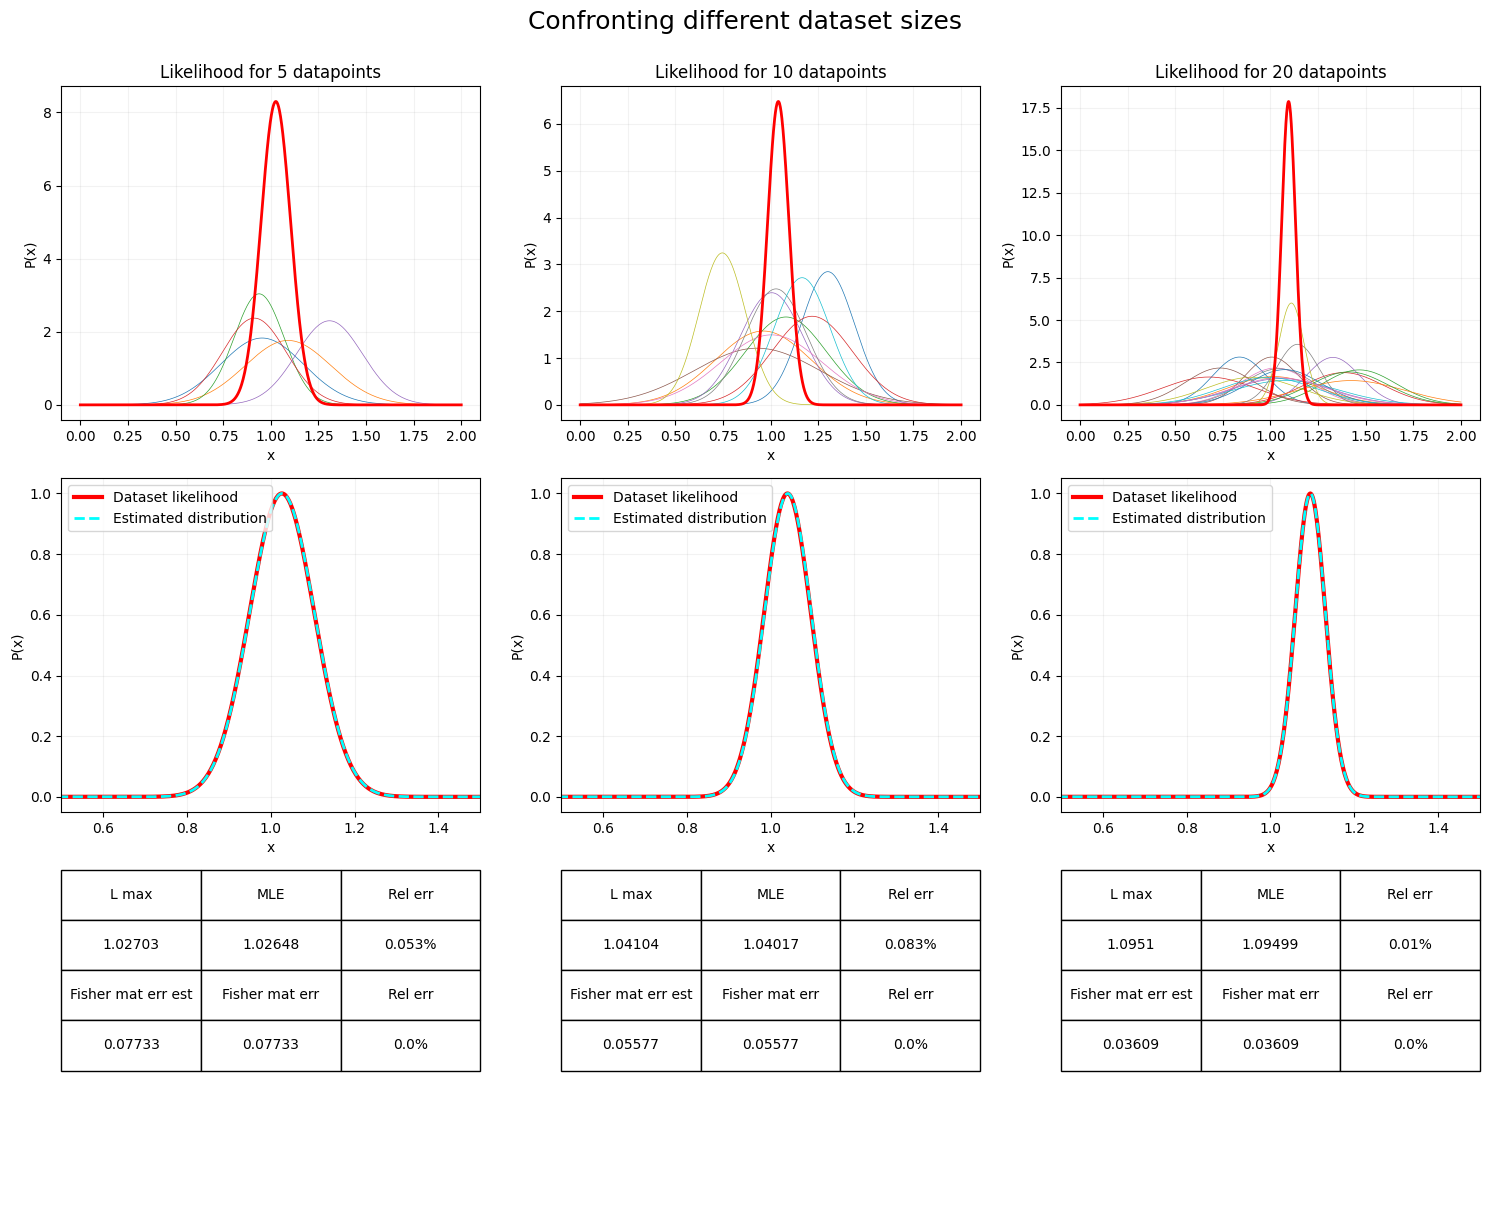

In [41]:
# Keeping three values of N

Dataset_size = np.array([5, 10, 20])
mu = 1

fig, ax = plt.subplots(3, 3, figsize=(15, 13))
fig.suptitle('Confronting different dataset sizes', fontsize = 18)

grid = np.linspace(0, 2, 1000)
dx = grid[1]-grid[0]

for i, N in enumerate(Dataset_size):

    sigma = np.random.normal(loc=0.2, scale=0.05, size = N)
    
    likelihood = 1
    num = 0
    den = 0     # For mu = sum(x_i/sigma_i^2)/sum(1/sigma_i^2)
    
    for j in range(N):
        x_sample = np.random.normal(loc=mu, scale=sigma[j], size=1)
        gaussian = norm(loc=x_sample,scale=sigma[j])
        ax[0, i].plot(grid, gaussian.pdf(grid), lw = 0.5)
        likelihood *= gaussian.pdf(grid)

        num += x_sample[0]/sigma[j]**2
        den += 1/sigma[j]**2

    ax[0, i].plot(grid, likelihood, lw = 2, c = 'red', label = 'Dataset likelihood')
    ax[0, i].set_xlabel('x')
    ax[0, i].set_ylabel('P(x)')
    ax[0, i].grid(c='grey', alpha = 0.1)
    ax[0, i].set_title('Likelihood for ' + str(N) + ' datapoints')

    sort = np.argsort(likelihood)
    max_ind = sort[-1]
    l_max = grid[max_ind]
    mu_exp = num/den
    rel_err_mu = abs(l_max - mu_exp) / mu_exp * 100

    lnL = np.log(likelihood)
    d2lnL = np.diff(lnL, n=2)     
    
    sigma_mu = d2lnL/(dx**2)
    sigma_mu *= -1
    sigma_mu = 1/np.sqrt(sigma_mu)
    sigma_mu_exp = den**(-1/2)

    est_gauss = norm(loc=l_max, scale=sigma_mu[max_ind])
    ax[1, i].plot(grid, likelihood/max(likelihood), lw = 3, c = 'red', 
                  label = 'Dataset likelihood')
    ax[1, i].plot(grid, est_gauss.pdf(grid)/max(est_gauss.pdf(grid)), lw = 2, ls = 'dashed', c = 'aqua', 
                  label = 'Estimated distribution')
    ax[1, i].set_xlabel('x')
    ax[1, i].set_ylabel('P(x)')
    ax[1, i].set_xlim([0.50, 1.50])
    ax[1, i].grid(c='grey', alpha = 0.1)
    ax[1, i].legend()

    table_data = np.column_stack((['L max'] + [str(round(l_max, 5))] + ['Fisher mat err est'] + [str(round(sigma_mu[max_ind], 5))],
                                  ['MLE'] + [str(round(mu_exp, 5))] + ['Fisher mat err'] + [str(round(sigma_mu_exp, 5))],
                                  ['Rel err'] + [str(round(abs(l_max-mu_exp)/mu_exp*100, 3)) + '%'] + ['Rel err'] + [str(round(abs(sigma_mu[max_ind]-sigma_mu_exp)/sigma_mu_exp*100, 3)) + '%']))

    ax[2, i].axis('off')
    table = ax[2, i].table(cellText=table_data, loc='center', cellLoc='center', colLabels=None, bbox=[0.0, 0.4, 1.0, 0.6])
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.3, 1.2)

plt.subplots_adjust(hspace=0.1)  
plt.tight_layout(rect=[0, 0.05, 1, 0.98], w_pad=1.5)
plt.show()